# `imbrium` integration testing

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [2]:
import imbrium
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

imbrium.__version__

'3.0.0'

In [3]:
# if you use tensorboard within a jupyter notebook and get an error: 
# delete files in:  C:\Users\<UserName>\AppData\Local\Temp\.tensorboard-info
# %load_ext tensorboard

In [4]:
example_data = pd.read_csv('example_dataset/AirQualityUCI.csv', delimiter=';')
example_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
example_data = example_data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)']]

In [6]:
example_data.isna().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
dtype: int64

In [7]:
example_data = example_data.dropna()

In [8]:
example_data.notna().sum()

CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
dtype: int64

In [9]:
example_data = example_data.replace(",", ".", regex = True).astype("float")

In [10]:
uni_var_data_example = pd.DataFrame(example_data['PT08.S1(CO)'])

<Axes: >

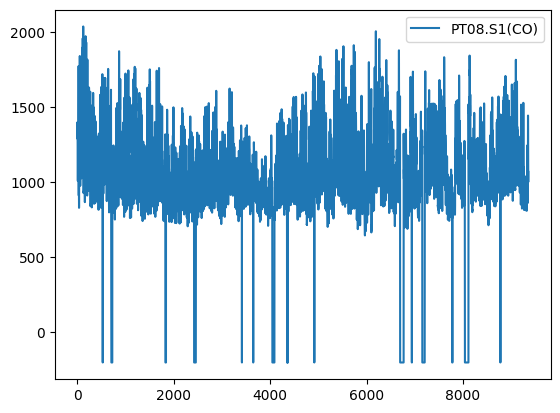

In [11]:
uni_var_data_example.plot()

In [12]:
scaler = StandardScaler()

# Fit and transform the data using the scaler
normalized_uni_var_data_example = pd.DataFrame(scaler.fit_transform(uni_var_data_example))

<Axes: >

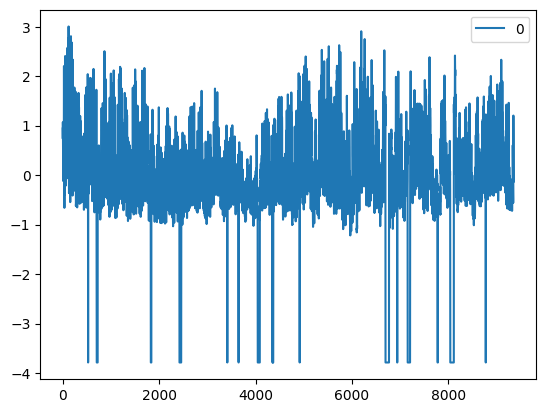

In [13]:
normalized_uni_var_data_example.plot()

In [14]:
normalized_uni_var_data_example = np.array(normalized_uni_var_data_example)
normalized_uni_var_data_example

array([[ 0.94298276],
       [ 0.73680662],
       [ 1.07032685],
       ...,
       [ 0.28200632],
       [-0.13944196],
       [ 0.06673418]])

## 1. Pure Univariate Models - `PureUni` Class

In [15]:
from imbrium import PureUni

In [16]:
layer_config = {
   "layer0": {"config": {"neurons": 300, "activation": "relu", "regularization": 0.01, "dropout": 0.2}},
   "layer1": {"config": {"neurons": 150, "activation": "relu", "regularization": 0.01, "dropout": 0.2}},
   "layer2": {"config": {"neurons": 100, "activation": "relu", "regularization": 0.0}},

}

In [17]:
predictor = PureUni( target = normalized_uni_var_data_example)
predictor.create_mlp(
                      steps_past =  20,
                      steps_future = 5,
                      optimizer= 'adam',
                      loss= 'mean_squared_error',
                      metrics = 'mean_squared_error',
                      dense_block_one = 1,
                      dense_block_two = 1,
                      dense_block_three = 1,
                      layer_config = layer_config
                     )

In [18]:
predictor.fit_model(
                     epochs = 5,
                     show_progress= 1,
                     board = False
                    )

Epoch 1/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1866 - mean_squared_error: 0.6624 - val_loss: 1.2274 - val_mean_squared_error: 0.7224
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8219 - mean_squared_error: 0.4035 - val_loss: 0.9060 - val_mean_squared_error: 0.6575
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6071 - mean_squared_error: 0.3876 - val_loss: 0.9087 - val_mean_squared_error: 0.7404
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5375 - mean_squared_error: 0.3860 - val_loss: 0.9986 - val_mean_squared_error: 0.8783
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4954 - mean_squared_error: 0.3820 - val_loss: 1.0098 - val_mean_squared_error: 0.9078


In [19]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7481 - mean_squared_error: 0.6460


[0.6441938281059265, 0.5421194434165955]

In [20]:
predictor.show_performance().history

{'loss': [1.5367999076843262,
  0.6949438452720642,
  0.5605645179748535,
  0.48633816838264465,
  0.4597262740135193],
 'mean_squared_error': [0.4755059778690338,
  0.3427034616470337,
  0.3625960648059845,
  0.34721240401268005,
  0.35216307640075684],
 'val_loss': [1.2274067401885986,
  0.9060357809066772,
  0.9086717367172241,
  0.9986255764961243,
  1.009844422340393],
 'val_mean_squared_error': [0.7224173545837402,
  0.6575401425361633,
  0.7404453158378601,
  0.878305971622467,
  0.9077701568603516]}

In [21]:
predictor.predict(normalized_uni_var_data_example[-20:])

array([[0.23037891],
       [0.26377493],
       [0.3683911 ],
       [0.3612512 ],
       [0.4030169 ]], dtype=float32)

In [22]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │           6,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,167 (785.81 KB)

 Trainable params: 67,055 (261.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,112 (523.88 KB)

In [23]:
predictor = PureUni( target = normalized_uni_var_data_example)

In [24]:
predictor.create_fit_mlp(
        steps_past = 10,
        steps_future = 20,
        optimizer = "adam",
        optimizer_args = None,
        loss = "mean_squared_error",
        metrics = "mean_squared_error",
        dense_block_one = 1,
        dense_block_two = 1,
        dense_block_three  = 1,
        epochs = 10,
        show_progress  = 1,
        board = False,
        monitor='val_loss',
        patience=1,
        min_delta = 0,
        verbose = 1
)

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8350 - mean_squared_error: 0.8350 - val_loss: 1.2467 - val_mean_squared_error: 1.2467
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6219 - mean_squared_error: 0.6219 - val_loss: 1.1056 - val_mean_squared_error: 1.1056
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5770 - mean_squared_error: 0.5770 - val_loss: 1.0370 - val_mean_squared_error: 1.0370
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5544 - mean_squared_error: 0.5544 - val_loss: 1.0208 - val_mean_squared_error: 1.0208
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5406 - mean_squared_error: 0.5406 - val_loss: 0.9854 - val_mean_squared_error: 0.9854
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5290 - mean_squared_error: 0.5290 - val_loss: 0.9819 - val_mean_squared_error: 0.9819
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5213 - mean_squared_error: 0.5213 - val_loss: 0.98

0.46138307452201843

In [25]:
predictor.show_performance().history

{'loss': [0.7092711925506592,
  0.5525003671646118,
  0.5184313654899597,
  0.5012619495391846,
  0.4921128749847412,
  0.4827145040035248,
  0.4764411747455597,
  0.4701279401779175,
  0.4646742045879364,
  0.46138307452201843],
 'mean_squared_error': [0.7092711925506592,
  0.5525003671646118,
  0.5184313654899597,
  0.5012619495391846,
  0.4921128749847412,
  0.4827145040035248,
  0.4764411747455597,
  0.4701279401779175,
  0.4646742045879364,
  0.46138307452201843],
 'val_loss': [1.2466695308685303,
  1.1055625677108765,
  1.036998987197876,
  1.0208134651184082,
  0.9853560328483582,
  0.9819448590278625,
  0.9814245700836182,
  0.9647511839866638,
  0.9617246985435486,
  0.9572798013687134],
 'val_mean_squared_error': [1.2466695308685303,
  1.1055625677108765,
  1.036998987197876,
  1.0208134651184082,
  0.9853560328483582,
  0.9819448590278625,
  0.9814245700836182,
  0.9647511839866638,
  0.9617246985435486,
  0.9572798013687134]}

In [26]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6900 - mean_squared_error: 0.6900


[0.5478261113166809, 0.5478261113166809]

In [27]:
predictor.get_target

array([[ 0.94298276],
       [ 0.73680662],
       [ 1.07032685],
       ...,
       [ 0.28200632],
       [-0.13944196],
       [ 0.06673418]])

In [28]:
predictor.get_target_shape

(9357, 1)

In [29]:
predictor.get_X_input_shape

(7463, 10)

In [30]:
predictor.get_y_input_shape

(7463, 20, 1)

In [31]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[ 0.43002537],
       [ 0.4102211 ],
       [ 0.6431164 ],
       [ 0.7349169 ],
       [ 0.8041047 ],
       [ 0.58520544],
       [ 0.504101  ],
       [ 0.18020074],
       [ 0.05220242],
       [-0.10528614],
       [-0.32282808],
       [-0.24735686],
       [-0.47127128],
       [-0.35543478],
       [-0.3432203 ],
       [ 0.1394891 ],
       [ 0.75091994],
       [ 1.0387424 ],
       [ 0.8352416 ],
       [ 0.4524381 ]], dtype=float32)

In [32]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │           1,020 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,012 (78.18 KB)

 Trainable params: 6,670 (26.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,342 (52.12 KB)

In [33]:
predictor = PureUni(target = normalized_uni_var_data_example)

predictor.create_rnn(
                      steps_past =  5,
                      steps_future = 10,
                      optimizer = 'adam', 
                      loss = 'mean_squared_error', 
                      metrics = 'mean_squared_error',
                      rnn_block_one  = 1,
                      rnn_block_two  = 1,
                      rnn_block_three  = 1,
                      layer_config = layer_config
                     )

predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1.8639 - mean_squared_error: 0.7978 - val_loss: 1.8006 - val_mean_squared_error: 1.6512
Epoch 2/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7950 - mean_squared_error: 0.6763 - val_loss: 1.7502 - val_mean_squared_error: 1.6746
Epoch 3/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7819 - mean_squared_error: 0.7152 - val_loss: 1.7018 - val_mean_squared_error: 1.6342
Epoch 4/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7753 - mean_squared_error: 0.7171 - val_loss: 1.6332 - val_mean_squared_error: 1.5847
Epoch 5/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7233 - mean_squared_error: 0.6791 - val_loss: 1.4725 - val_mean_squared_error: 1.4310
Epoch 6/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6815 - mean_squared_error: 0.6426 - val_loss: 1.3452 - val_mean_squared_error: 1.3088
Epoch 7/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6383 - mean_squared_error: 0.6030 - val_loss: 0.95

In [34]:
predictor.evaluate_model()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7054 - mean_squared_error: 0.6733


[0.603152334690094, 0.5710740685462952]

In [35]:
predictor.show_performance().history

{'loss': [1.2713359594345093,
  0.7208596467971802,
  0.7534000873565674,
  0.7052781581878662,
  0.6452983617782593,
  0.6019017696380615,
  0.5553877353668213],
 'mean_squared_error': [0.6679327487945557,
  0.6211999654769897,
  0.6879484057426453,
  0.6520674228668213,
  0.6025530099868774,
  0.5638761520385742,
  0.520866334438324],
 'val_loss': [1.8005701303482056,
  1.7502118349075317,
  1.7018322944641113,
  1.6332067251205444,
  1.4724786281585693,
  1.3451637029647827,
  0.9533035159111023],
 'val_mean_squared_error': [1.6512253284454346,
  1.6745697259902954,
  1.6341805458068848,
  1.5847045183181763,
  1.431047797203064,
  1.3088116645812988,
  0.921225368976593]}

In [36]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7054 - mean_squared_error: 0.6733


[0.603152334690094, 0.5710740685462952]

In [37]:
predictor.predict(normalized_uni_var_data_example[-5:])

array([[0.03520063],
       [0.03884248],
       [0.07233337],
       [0.10984624],
       [0.157979  ],
       [0.2293635 ],
       [0.30055395],
       [0.3032694 ],
       [0.28638288],
       [0.2406204 ]], dtype=float32)

In [38]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 5, 300)              │          90,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 300)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 5, 150)              │          67,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,082 (2.11 MB)

 Trainable params: 184,360 (720.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 368,722 (1.41 MB)

In [39]:
predictor.create_fit_rnn(steps_past = 3, steps_future = 3, epochs=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.6092 - mean_squared_error: 0.6092 - val_loss: 0.6143 - val_mean_squared_error: 0.6143


0.44751831889152527

In [40]:
predictor.predict(normalized_uni_var_data_example[-3:])

array([[0.13347444],
       [0.12686618],
       [0.11190235]], dtype=float32)

In [41]:
predictor = PureUni(target = normalized_uni_var_data_example)

predictor.create_lstm(
                       steps_past =  5,
                       steps_future = 10,
                       optimizer = 'adam',
                       loss = 'mean_squared_error',
                       metrics = 'mean_squared_error',
                       layer_config = layer_config
                      )

predictor.fit_model(
                     epochs = 5,
                     show_progress= 1,
                    )

Epoch 1/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 2.2209 - mean_squared_error: 0.8570 - val_loss: 1.7982 - val_mean_squared_error: 1.7928
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8372 - mean_squared_error: 0.8284 - val_loss: 1.8090 - val_mean_squared_error: 1.7935
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 2.3326 - mean_squared_error: 2.3114 - val_loss: 1.8190 - val_mean_squared_error: 1.7736
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.8531 - mean_squared_error: 0.8045 - val_loss: 1.5732 - val_mean_squared_error: 1.5082
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7838 - mean_squared_error: 0.7272 - val_loss: 1.4598 - val_mean_squared_error: 1.3984


In [42]:
predictor.show_performance()

In [43]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.0492 - mean_squared_error: 0.9879


[0.8961767554283142, 0.834859311580658]

In [44]:
predictor.predict(normalized_uni_var_data_example[-5:])

array([[0.42166126],
       [0.40163177],
       [0.33364233],
       [0.3485417 ],
       [0.39048058],
       [0.2920406 ],
       [0.27891037],
       [0.28983253],
       [0.28131312],
       [0.19763388]], dtype=float32)

In [45]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 300)              │         362,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 300)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 150)              │         270,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,203,232 (8.40 MB)

 Trainable params: 734,410 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,468,822 (5.60 MB)

In [46]:
predictor.show_performance()

In [47]:
predictor.create_fit_lstm(steps_past = 1, steps_future = 1, epochs=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.8199 - mean_squared_error: 0.8199 - val_loss: 1.0083 - val_mean_squared_error: 1.0083


0.6445146799087524

In [48]:
predictor.predict(normalized_uni_var_data_example[-1:])

array([[0.08492503]], dtype=float32)

In [49]:
predictor = PureUni(target = normalized_uni_var_data_example)

predictor.create_gru(
                      steps_past =  5,
                      steps_future = 10, 
                      optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = 'mean_squared_error',
                      layer_config = layer_config
                     )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 2.1970 - mean_squared_error: 0.8466 - val_loss: 1.7310 - val_mean_squared_error: 1.7022
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7418 - mean_squared_error: 0.7147 - val_loss: 1.4382 - val_mean_squared_error: 1.4156


In [50]:
predictor.show_performance()

In [51]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0117 - mean_squared_error: 0.9891


[0.8626322150230408, 0.8400388360023499]

In [52]:
predictor.predict(normalized_uni_var_data_example[-5:])

array([[0.16321023],
       [0.15263948],
       [0.21079285],
       [0.19943525],
       [0.17460719],
       [0.1795841 ],
       [0.14220557],
       [0.13909061],
       [0.10265805],
       [0.10204436]], dtype=float32)

In [53]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 5, 300)              │         272,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 300)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 5, 150)              │         203,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100)                 │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,132 (6.33 MB)

 Trainable params: 552,710 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,105,422 (4.22 MB)

In [54]:
predictor.create_fit_gru(steps_past = 3, steps_future = 20, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.8588 - mean_squared_error: 0.8588 - val_loss: 1.7087 - val_mean_squared_error: 1.7087


0.7741727232933044

In [55]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1665 - mean_squared_error: 1.1665


[0.9911873936653137, 0.9911873936653137]

In [56]:
predictor.predict(normalized_uni_var_data_example[-3:])

array([[0.25981468],
       [0.2066331 ],
       [0.15993416],
       [0.12952074],
       [0.18240061],
       [0.11765451],
       [0.11717488],
       [0.1276522 ],
       [0.12185939],
       [0.14513654],
       [0.06645898],
       [0.10135858],
       [0.08642127],
       [0.11806004],
       [0.10495432],
       [0.14548269],
       [0.10352667],
       [0.11654188],
       [0.16979168],
       [0.15202147]], dtype=float32)

In [57]:
layer_config_cnn = {
   "layer0": {"config": {"filters": 64, "kernel_size": 2, "activation": "relu", "regularization": 0.0, "dropout": 0.0}},
   "layer1": {"config": {"filters": 100, "kernel_size": 2, "activation": "relu", "regularization": 0.0, "dropout": 0.0}},
   "layer2": {"config": {"pool_size": 4}},
   "layer3": {"config": {"neurons": 100, "activation": "relu", "regularization": 0.0}},

}

In [58]:
predictor = PureUni(target = normalized_uni_var_data_example)

predictor.create_cnn(
                      steps_past =  16,
                      steps_future = 10,
                      optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = 'mean_squared_error',
                      layer_config = layer_config_cnn
                     )

predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.8342 - mean_squared_error: 0.8342 - val_loss: 1.4073 - val_mean_squared_error: 1.4073
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6409 - mean_squared_error: 0.6409 - val_loss: 1.1714 - val_mean_squared_error: 1.1714


In [59]:
predictor.get_target_shape

(9357, 1)

In [60]:
predictor.show_performance()

In [61]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8166 - mean_squared_error: 0.8166


[0.668334424495697, 0.668334424495697]

In [62]:
predictor.predict(normalized_uni_var_data_example[-16:])

array([[ 0.56037945],
       [ 0.4967287 ],
       [ 0.6130143 ],
       [ 0.4934892 ],
       [ 0.42601103],
       [ 0.2932953 ],
       [ 0.23024258],
       [ 0.13204628],
       [-0.10738508],
       [-0.13442999]], dtype=float32)

In [63]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 15, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 14, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,608 (518.00 KB)

 Trainable params: 44,202 (172.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,406 (345.34 KB)

In [64]:
predictor.create_fit_cnn(steps_past = 8, steps_future = 10, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8389 - mean_squared_error: 0.8389 - val_loss: 1.2890 - val_mean_squared_error: 1.2890


0.7166181206703186

In [65]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8702 - mean_squared_error: 0.8702


[0.7423178553581238, 0.7423178553581238]

In [66]:
predictor.get_target_shape

(9357, 1)

In [67]:
predictor.predict(normalized_uni_var_data_example[-8:])

array([[-0.13167918],
       [ 0.23695192],
       [ 0.14264786],
       [ 0.05622064],
       [ 0.1920195 ],
       [ 0.02097969],
       [ 0.25203145],
       [ 0.21463774],
       [ 0.3583122 ],
       [ 0.16925839]], dtype=float32)

In [68]:
layer_config_bi = {
   "layer0": {"config": {"neurons": 50, "activation": "relu", "regularization": 0.0, "dropout": 0.0}},
   "layer1": {"config": {"neurons": 50, "activation": "relu", "regularization": 0.0}},
}

In [69]:
predictor = PureUni(target = normalized_uni_var_data_example)

predictor.create_birnn(
                        steps_past =  5,
                        steps_future = 10,
                        optimizer = 'adam',
                        loss = 'mean_squared_error',
                        metrics = 'mean_squared_error',
                        layer_config = layer_config_bi
                       )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1, 
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.8734 - mean_squared_error: 0.8734 - val_loss: 1.3371 - val_mean_squared_error: 1.3371
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6195 - mean_squared_error: 0.6195 - val_loss: 1.0163 - val_mean_squared_error: 1.0163


In [70]:
predictor.get_target_shape

(9357, 1)

In [71]:
predictor.show_performance()

In [72]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7228 - mean_squared_error: 0.7228


[0.6210941672325134, 0.6210941672325134]

In [73]:
predictor.predict(normalized_uni_var_data_example[-5:])

array([[ 0.05032208],
       [-0.00097784],
       [-0.1597596 ],
       [-0.1421428 ],
       [ 0.16393226],
       [ 0.10944409],
       [ 0.27219468],
       [ 0.15386464],
       [ 0.3271308 ],
       [ 0.12382258]], dtype=float32)

In [74]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 100)              │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,782 (155.40 KB)

 Trainable params: 13,260 (51.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,522 (103.61 KB)

In [75]:
predictor.create_fit_birnn(steps_past = 10, steps_future = 3, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7090 - mean_squared_error: 0.7090 - val_loss: 0.6040 - val_mean_squared_error: 0.6040


0.5129088163375854

In [76]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4166 - mean_squared_error: 0.4166


[0.3686385154724121, 0.3686385154724121]

In [77]:
predictor.get_target_shape

(9357, 1)

In [78]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[ 0.06881274],
       [-0.06674024],
       [ 0.16886649]], dtype=float32)

In [79]:
predictor = PureUni(target = normalized_uni_var_data_example)

predictor.create_bilstm(
                         steps_past =  5,
                         steps_future = 10,
                         optimizer = 'adam',
                         loss = 'mean_squared_error',
                         metrics = 'mean_squared_error',
                         layer_config = layer_config_bi
                        )
predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.8572 - mean_squared_error: 0.8572 - val_loss: 0.9728 - val_mean_squared_error: 0.9728
Epoch 2/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6598 - mean_squared_error: 0.6598 - val_loss: 0.8131 - val_mean_squared_error: 0.8131
Epoch 3/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5912 - mean_squared_error: 0.5912 - val_loss: 1.1716 - val_mean_squared_error: 1.1716
Epoch 3: early stopping


In [80]:
predictor.show_performance()

In [81]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8135 - mean_squared_error: 0.8135


[0.695687472820282, 0.695687472820282]

In [82]:
predictor.predict(normalized_uni_var_data_example[-5:])

array([[0.12884566],
       [0.15192914],
       [0.15749772],
       [0.14413218],
       [0.16413362],
       [0.18869165],
       [0.16291226],
       [0.16279942],
       [0.14309502],
       [0.13743508]], dtype=float32)

In [83]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 100)              │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,532 (603.64 KB)

 Trainable params: 51,510 (201.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,022 (402.43 KB)

In [84]:
predictor.create_fit_bilstm(steps_past = 10, steps_future = 2, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.8518 - mean_squared_error: 0.8518 - val_loss: 1.3783 - val_mean_squared_error: 1.3783


0.6402753591537476

In [85]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9289 - mean_squared_error: 0.9289


[0.7950073480606079, 0.7950073480606079]

In [86]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[0.10774332],
       [0.14309114]], dtype=float32)

In [87]:
predictor = PureUni(target = normalized_uni_var_data_example, evaluation_split = 0.1, validation_split = 0.2)

predictor.create_bigru(
                        steps_past =  5,
                        steps_future = 10,
                        optimizer = 'adam',
                        loss = 'mean_squared_error',
                        metrics = 'mean_squared_error',
                        layer_config = layer_config_bi
                       )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.8401 - mean_squared_error: 0.8401 - val_loss: 1.2566 - val_mean_squared_error: 1.2566
Epoch 2/2
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5872 - mean_squared_error: 0.5872 - val_loss: 0.7553 - val_mean_squared_error: 0.7553


In [88]:
predictor.show_performance()

In [89]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2744 - mean_squared_error: 0.2744


[0.30158373713493347, 0.30158373713493347]

In [90]:
predictor.predict(normalized_uni_var_data_example[-5:])

array([[0.14068633],
       [0.10257055],
       [0.11696257],
       [0.15217887],
       [0.16372405],
       [0.18724996],
       [0.16785747],
       [0.13461246],
       [0.16495183],
       [0.1397087 ]], dtype=float32)

In [91]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 100)              │          15,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,632 (459.50 KB)

 Trainable params: 39,210 (153.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 78,422 (306.34 KB)

In [92]:
predictor.create_fit_bigru(steps_past = 10, steps_future = 2, epochs=1)

211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.6633 - mean_squared_error: 0.6633 - val_loss: 0.3007 - val_mean_squared_error: 0.3007


0.4763103723526001

In [93]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1647 - mean_squared_error: 0.1647


[0.1852674037218094, 0.1852674037218094]

In [94]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[-0.00579795],
       [ 0.03389011]], dtype=float32)

In [95]:
predictor.freeze("test1.keras")

In [96]:
load = PureUni()

In [97]:
load.set_model_id('Loaded Model')

In [98]:
load.retrieve('test1.keras')

In [99]:
load.predict(normalized_uni_var_data_example[-10:])

array([[-0.00579795],
       [ 0.03389011]], dtype=float32)

In [100]:
layer_config_bi_flex = {
   "layer0": {"config": {"neurons": 150, "activation": "relu", "regularization": 0.02, "dropout": 0.2}},
    "layer1": {"config": {"neurons": 100, "activation": "relu", "regularization": 0.02, "dropout": 0.2}},
    "layer2": {"config": {"neurons": 50, "activation": "relu", "regularization": 0.002, "dropout": 0.2}},
    "layer3": {"config": {"neurons": 25, "activation": "relu", "regularization": 0.0, "dropout": 0.2}},
   "layer4": {"config": {"neurons": 10, "activation": "relu", "regularization": 0.0}},
}

In [101]:
predictor_bi_lstm_flex = PureUni(target = normalized_uni_var_data_example)

In [102]:
predictor_bi_lstm_flex.create_fit_bilstm(
        steps_past =  5,
        steps_future = 10,
        optimizer  = "adam",
        optimizer_args  = None,
        loss = "mean_squared_error",
        metrics = "mean_squared_error",
        bilstm_block_one = 3,
        lstm_block_one = 2,
        layer_config =  layer_config_bi_flex,
        epochs  = 3,
        show_progress = 1,
        board = False,
)

Epoch 1/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - loss: 6.2304 - mean_squared_error: 0.8594 - val_loss: 1.8051 - val_mean_squared_error: 1.8038
Epoch 2/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8584 - mean_squared_error: 0.8580 - val_loss: 1.8050 - val_mean_squared_error: 1.8050
Epoch 3/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8561 - mean_squared_error: 0.8561 - val_loss: 1.8057 - val_mean_squared_error: 1.8057


0.7857683897018433

In [103]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1647 - mean_squared_error: 0.1647


[0.1852674037218094, 0.1852674037218094]

In [104]:
predictor_bi_lstm_flex.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 300)              │         182,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 300)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 5, 200)              │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 5, 100)              │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 5, 25)               │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 25)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 10)                  │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,853,252 (7.07 MB)

 Trainable params: 617,750 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,235,502 (4.71 MB)

In [105]:
predictor_bi_lstm_flex.predict(normalized_uni_var_data_example[-5:])

array([[0.01692482],
       [0.01698844],
       [0.01755665],
       [0.01752465],
       [0.0163361 ],
       [0.01851689],
       [0.01666378],
       [0.01764836],
       [0.01727874],
       [0.01590137]], dtype=float32)

## 2. Hybrid Univariate Models - `HybridUni` Class

In [106]:
from imbrium import HybridUni

In [107]:
layer_config_cnn_hybrid = {
            "layer0": {
                "config": {
                    "filters": 64,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "filters": 32,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {
                    "pool_size": 2,
                }
            },
            "layer3": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer4": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [108]:
predictor = HybridUni(target = normalized_uni_var_data_example)

predictor.create_cnnrnn(
                         sub_seq = 2,
                         steps_past = 10,
                         steps_future = 5,
                         optimizer= 'adam',
                         loss= 'mean_squared_error',
                         metrics = 'mean_squared_error', 
                         conv_block_one = 1,
                         conv_block_two = 1,
                         rnn_block_one = 1,
                         rnn_block_two = 1,
                         layer_config = layer_config_cnn_hybrid
                        )
predictor.fit_model(
                     epochs = 3,
                     show_progress= 1,
                     board = True
                     )

Epoch 1/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.8877 - mean_squared_error: 0.8877 - val_loss: 1.4016 - val_mean_squared_error: 1.4016
Epoch 2/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6340 - mean_squared_error: 0.6340 - val_loss: 0.9996 - val_mean_squared_error: 0.9996
Epoch 3/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5731 - mean_squared_error: 0.5731 - val_loss: 0.9223 - val_mean_squared_error: 0.9223


In [109]:
predictor.get_target_shape

(9357, 1)

In [110]:
predictor.show_performance().history

{'loss': [0.7586310505867004, 0.5332945585250854, 0.4846777319908142],
 'mean_squared_error': [0.7586310505867004,
  0.5332945585250854,
  0.4846777319908142],
 'val_loss': [1.4015860557556152, 0.999636709690094, 0.9222628474235535],
 'val_mean_squared_error': [1.4015860557556152,
  0.999636709690094,
  0.9222628474235535]}

In [111]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6453 - mean_squared_error: 0.6453


[0.5579750537872314, 0.5579750537872314]

In [112]:
predictor.evaluate_model()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6453 - mean_squared_error: 0.6453


[0.5579750537872314, 0.5579750537872314]

In [113]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[0.04266464],
       [0.31249344],
       [0.36380774],
       [0.5041616 ],
       [0.7048645 ]], dtype=float32)

In [114]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 5, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 5, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 5, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 5, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 2, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, None, 32)            │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,673 (88.57 KB)

 Trainable params: 7,557 (29.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,116 (59.05 KB)

In [115]:
predictor.create_fit_cnnrnn(epochs=1, sub_seq=2, steps_past=20, steps_future=5)


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.8311 - mean_squared_error: 0.8311 - val_loss: 1.1135 - val_mean_squared_error: 1.1135


0.6725277304649353

In [116]:
predictor.show_performance().history

{'loss': [0.6725277304649353],
 'mean_squared_error': [0.6725277304649353],
 'val_loss': [1.1135488748550415],
 'val_mean_squared_error': [1.1135488748550415]}

In [117]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7880 - mean_squared_error: 0.7880


[0.6726716756820679, 0.6726716756820679]

In [118]:
predictor.predict(normalized_uni_var_data_example[-20:])

array([[0.2059431 ],
       [0.18757004],
       [0.06504884],
       [0.2435113 ],
       [0.07576643]], dtype=float32)

In [119]:
predictor.get_target_shape

(9357, 1)

In [120]:
predictor = HybridUni(target = normalized_uni_var_data_example, evaluation_split = 0.1, validation_split = 0.2)

predictor.create_cnnlstm(
                          sub_seq = 8,
                          steps_past = 16,
                          steps_future = 8, 
                          optimizer= 'adam',
                          loss= 'mean_squared_error',
                          metrics = 'mean_squared_error',
                          layer_config = layer_config_cnn_hybrid
                         )
predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.8560 - mean_squared_error: 0.8560 - val_loss: 1.3267 - val_mean_squared_error: 1.3267
Epoch 2/7
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.6172 - mean_squared_error: 1.6172 - val_loss: 1.6016 - val_mean_squared_error: 1.6016
Epoch 2: early stopping


In [121]:
predictor.show_performance()

In [122]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2948 - mean_squared_error: 0.2948


[0.3095426857471466, 0.3095426857471466]

In [123]:
predictor.predict(normalized_uni_var_data_example[-16:])

array([[0.22569405],
       [0.3282568 ],
       [0.2854494 ],
       [0.19793567],
       [0.14239027],
       [0.14816943],
       [0.1845683 ],
       [0.17029221]], dtype=float32)

In [124]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 2, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 2, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 2, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 2, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 1, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, None, 32)            │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,338 (223.98 KB)

 Trainable params: 19,112 (74.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,226 (149.32 KB)

In [125]:
predictor.create_fit_cnnlstm(sub_seq = 2, steps_past = 10, steps_future = 5,epochs=1)

211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.8512 - mean_squared_error: 0.8512 - val_loss: 1.6718 - val_mean_squared_error: 1.6718


0.8451955318450928

In [126]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3180 - mean_squared_error: 0.3180


[0.34443286061286926, 0.34443286061286926]

In [127]:
predictor = HybridUni(target = normalized_uni_var_data_example)

predictor.create_cnngru(
                         sub_seq = 2,
                         steps_past = 10,
                         steps_future = 5, 
                         optimizer= 'adam',
                         loss= 'mean_squared_error',
                         metrics = 'mean_squared_error',
                         layer_config = layer_config_cnn_hybrid
                        )
predictor.fit_model(
                     epochs = 5,
                     show_progress= 1,
                    )

Epoch 1/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.8660 - mean_squared_error: 0.8660 - val_loss: 1.7143 - val_mean_squared_error: 1.7143
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7277 - mean_squared_error: 0.7277 - val_loss: 1.2967 - val_mean_squared_error: 1.2967
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6245 - mean_squared_error: 0.6245 - val_loss: 0.8986 - val_mean_squared_error: 0.8986
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5603 - mean_squared_error: 0.5603 - val_loss: 0.8308 - val_mean_squared_error: 0.8308
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5421 - mean_squared_error: 0.5421 - val_loss: 0.8144 - val_mean_squared_error: 0.8144


In [128]:
predictor.show_performance()

In [129]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5783 - mean_squared_error: 0.5783


[0.49285560846328735, 0.49285560846328735]

In [130]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[-0.01259983],
       [ 0.08250187],
       [ 0.19000539],
       [ 0.5327938 ],
       [ 0.7958288 ]], dtype=float32)

In [131]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 5, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 5, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 5, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 5, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 2, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, None, 32)            │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,353 (212.32 KB)

 Trainable params: 18,117 (70.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,236 (141.55 KB)

In [132]:
predictor.create_fit_cnngru(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.8625 - mean_squared_error: 0.8625 - val_loss: 1.6593 - val_mean_squared_error: 1.6593


0.7701455950737

In [133]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1124 - mean_squared_error: 1.1124


[0.9438082575798035, 0.9438082575798035]

In [134]:
layer_config_bicnn_hybrid = {
            "layer0": {
                "config": {
                    "filters": 64,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "filters": 32,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {
                    "pool_size": 2,
                }
            },
            "layer3": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer4": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [135]:
predictor = HybridUni(target = normalized_uni_var_data_example, evaluation_split = 0.15, validation_split= 0.25)

predictor.create_cnnbirnn(
                           sub_seq = 2,
                           steps_past = 10,
                           steps_future = 5, 
                           optimizer= 'adam',
                           loss= 'mean_squared_error',
                           metrics = 'mean_squared_error',
                           layer_config =  layer_config_bicnn_hybrid
                          )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.8473 - mean_squared_error: 0.8473 - val_loss: 1.0946 - val_mean_squared_error: 1.0946
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6145 - mean_squared_error: 0.6145 - val_loss: 0.7715 - val_mean_squared_error: 0.7715


In [136]:
predictor.show_performance()

In [137]:
predictor.evaluate_model()
predictor.show_evaluation()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9128 - mean_squared_error: 0.9128


[0.559751033782959, 0.559751033782959]

In [138]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[-0.03881013],
       [ 0.17013538],
       [ 0.06605495],
       [ 0.12092424],
       [-0.03153656]], dtype=float32)

In [139]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 5, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 5, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 5, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 5, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 2, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, None, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,057 (136.95 KB)

 Trainable params: 11,685 (45.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,372 (91.30 KB)

In [140]:
predictor.create_fit_cnnbirnn(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.8049 - mean_squared_error: 0.8049 - val_loss: 0.8759 - val_mean_squared_error: 0.8759


0.6621691584587097

In [141]:
predictor.evaluate_model()
predictor.show_evaluation()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0669 - mean_squared_error: 1.0669


[0.6066572070121765, 0.6066572070121765]

In [142]:
predictor = HybridUni( target = normalized_uni_var_data_example, evaluation_split = 0.05, validation_split = 0.2)

predictor.create_cnnbilstm(
                            sub_seq = 2,
                            steps_past = 10,
                            steps_future = 5,
                            optimizer= 'adam',
                            loss= 'mean_squared_error',
                            metrics = 'mean_squared_error',
                            layer_config = layer_config_bicnn_hybrid
                           )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.8470 - mean_squared_error: 0.8470 - val_loss: 2.1453 - val_mean_squared_error: 2.1453
Epoch 2/2
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8908 - mean_squared_error: 0.8908 - val_loss: 1.2470 - val_mean_squared_error: 1.2470


In [143]:
predictor.show_performance()

In [144]:
predictor.evaluate_model()
predictor.show_evaluation()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4377 - mean_squared_error: 0.4377 


[0.37386998534202576, 0.37386998534202576]

In [145]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[ 0.10736023],
       [-0.0212064 ],
       [ 0.03947432],
       [ 0.13857032],
       [ 0.23713274]], dtype=float32)

In [146]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 5, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 5, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 5, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 5, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 2, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, None, 64)            │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,865 (464.32 KB)

 Trainable params: 39,621 (154.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 79,244 (309.55 KB)

In [147]:
predictor.create_fit_cnnbilstm(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.8519 - mean_squared_error: 0.8519 - val_loss: 1.0225 - val_mean_squared_error: 1.0225


0.8711161613464355

In [148]:
predictor.evaluate_model()
predictor.show_evaluation()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4472 - mean_squared_error: 0.4472 


[0.3790062367916107, 0.3790062367916107]

In [149]:
predictor = HybridUni(target = normalized_uni_var_data_example)

predictor.create_cnnbigru(
                           sub_seq = 2,
                           steps_past = 10,
                           steps_future = 5,
                           optimizer= 'adam',
                           loss= 'mean_squared_error',
                           metrics = 'mean_squared_error',
                           layer_config = layer_config_bicnn_hybrid
                          )
predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.8638 - mean_squared_error: 0.8638 - val_loss: 1.3680 - val_mean_squared_error: 1.3680
Epoch 2/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6266 - mean_squared_error: 0.6266 - val_loss: 1.0334 - val_mean_squared_error: 1.0334
Epoch 3/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5692 - mean_squared_error: 0.5692 - val_loss: 0.8165 - val_mean_squared_error: 0.8165
Epoch 4/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5366 - mean_squared_error: 0.5366 - val_loss: 0.7868 - val_mean_squared_error: 0.7868
Epoch 5/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5188 - mean_squared_error: 0.5188 - val_loss: 0.8079 - val_mean_squared_error: 0.8079
Epoch 5: early stopping


In [150]:
predictor.show_performance()

In [151]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5773 - mean_squared_error: 0.5773


[0.502862811088562, 0.502862811088562]

In [152]:
predictor.predict(normalized_uni_var_data_example[-10:])

array([[-0.21869455],
       [ 0.23392822],
       [ 0.2573366 ],
       [ 0.7011995 ],
       [ 0.8249471 ]], dtype=float32)

In [153]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 5, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 5, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 5, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 5, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 2, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, None, 64)            │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,793 (358.57 KB)

 Trainable params: 30,597 (119.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,196 (239.05 KB)

In [154]:
predictor.create_fit_cnnbigru(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.8837 - mean_squared_error: 0.8837 - val_loss: 1.3602 - val_mean_squared_error: 1.3602


0.7701985836029053

In [155]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9268 - mean_squared_error: 0.9268


[0.7904211282730103, 0.7904211282730103]

In [156]:
predictor.freeze("test2.keras")

In [157]:
load = HybridUni()

In [158]:
load.set_model_id('Loaded Model')

In [159]:
load.retrieve('test2.keras')

In [160]:
load.predict(normalized_uni_var_data_example[-10:], sub_seq=2, steps_past=10, steps_future = 5) # account for load model

array([[0.19924591],
       [0.34826162],
       [0.302314  ],
       [0.18012334],
       [0.12002596]], dtype=float32)

In [161]:
layer_config_bicnn_hybrid_flex = {
            "layer0": {
                "config": {
                    "filters": 64,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "filters": 32,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {
                    "filters": 16,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer3": {
                "config": {
                    "pool_size": 2,
                }
            },
            "layer4": {
                "config": {
                    "neurons": 100,
                    "activation": "relu",
                    "regularization": 0.002,
                    "dropout": 0.0,
                }
            },
            "layer5": {
                "config": {
                    "neurons": 50,
                    "activation": "relu",
                    "regularization": 0.002,
                    "dropout": 0.0,
                }
            },
            "layer6": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [162]:
cnnbilstm_flex = HybridUni(target = normalized_uni_var_data_example, evaluation_split = 0.10, validation_split =0.1)

In [163]:
cnnbilstm_flex.create_fit_cnnbilstm(
        sub_seq = 2,
        steps_past = 10,
        steps_future = 5,
        optimizer = "adamax",
        optimizer_args = None,
        epochs = 3,
        loss = "mean_squared_error",
        metrics = "mean_squared_error",
        conv_block_one = 2,
        conv_block_two = 1,
        bilstm_block_one = 2,
        lstm_block_one = 1,
        layer_config = layer_config_bicnn_hybrid_flex
)

Epoch 1/3
237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 1.2821 - mean_squared_error: 0.8662 - val_loss: 1.8294 - val_mean_squared_error: 1.8249
Epoch 2/3
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.8643 - mean_squared_error: 0.8618 - val_loss: 1.8176 - val_mean_squared_error: 1.8153
Epoch 3/3
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.8394 - mean_squared_error: 0.8345 - val_loss: 1.7453 - val_mean_squared_error: 1.7395


0.9454122185707092

In [164]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9268 - mean_squared_error: 0.9268


[0.7904211282730103, 0.7904211282730103]

In [165]:
cnnbilstm_flex.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 5, 64)         │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 5, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 5, 32)         │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 5, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 5, 16)         │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 5, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 2, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, None, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, None, 200)           │         106,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, None, 200)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, None, 100)           │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, None, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 680,177 (2.59 MB)

 Trainable params: 226,725 (885.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 453,452 (1.73 MB)

In [166]:
cnnbilstm_flex.predict(normalized_uni_var_data_example[-10:])

array([[0.22255814],
       [0.16376393],
       [0.12677202],
       [0.08739742],
       [0.09176198]], dtype=float32)

## 3. Pure Multivariate Models - `PureMulti` Class

In [167]:
from imbrium import PureMulti

In [168]:
target = np.array(example_data['PT08.S1(CO)']).reshape(-1, 1)

In [169]:
features = example_data[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)']]

In [170]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features and target separately
scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)

In [171]:
layer_config_multi =  {
            "layer0": {
                "config": {
                    "neurons": 50,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "neurons": 50,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {"neurons": 50, "activation": "relu", "regularization": 0.0}
            },
        }

In [172]:
predictor = PureMulti(target = scaled_target, features = scaled_features)

predictor.create_mlp(
                      steps_past =  5, 
                      steps_future = 10,
                      optimizer= 'adam',
                      loss= 'mean_squared_error',
                      metrics = 'mean_squared_error',
                      layer_config = layer_config_multi
                     )
predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1,
                     board = True
                    )

Epoch 1/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 3/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 4/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 5/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 6/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 7/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0169 - va

In [173]:
predictor.get_target_shape

(9357, 1)

In [174]:
predictor.show_performance().history

{'loss': [0.037609998136758804,
  0.012438279576599598,
  0.012040329165756702,
  0.011670732870697975,
  0.011373745277523994,
  0.01109563373029232,
  0.010882158763706684],
 'mean_squared_error': [0.037609998136758804,
  0.012438279576599598,
  0.012040329165756702,
  0.011670732870697975,
  0.011373745277523994,
  0.01109563373029232,
  0.010882158763706684],
 'val_loss': [0.02024855650961399,
  0.01920904591679573,
  0.018607404083013535,
  0.018160851672291756,
  0.01749148592352867,
  0.017154516652226448,
  0.016944583505392075],
 'val_mean_squared_error': [0.02024855650961399,
  0.01920904591679573,
  0.018607404083013535,
  0.018160851672291756,
  0.01749148592352867,
  0.017154516652226448,
  0.016944583505392075]}

In [175]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129


[0.012148840352892876, 0.012148840352892876]

In [176]:
predictor.predict(scaled_features[-5:])

array([[0.5550128 ],
       [0.53830814],
       [0.53397036],
       [0.5283621 ],
       [0.5377178 ],
       [0.53992295],
       [0.5342295 ],
       [0.5572701 ],
       [0.5708318 ],
       [0.54478323]], dtype=float32)

In [177]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,982 (78.06 KB)

 Trainable params: 6,660 (26.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,322 (52.04 KB)

In [178]:
predictor.create_fit_mlp(epochs =3, steps_past =  10, steps_future = 10)

Epoch 1/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 2/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 3/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0205 - val_mean_squared_error: 0.0205


0.012605040334165096

In [179]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0152 - mean_squared_error: 0.0152


[0.014746638014912605, 0.014746638014912605]

In [180]:
predictor.get_target_shape

(9357, 1)

In [181]:
predictor.predict(scaled_features[-10:])

array([[0.5253364 ],
       [0.51802   ],
       [0.5414707 ],
       [0.5392461 ],
       [0.5063515 ],
       [0.5477056 ],
       [0.5434282 ],
       [0.51956064],
       [0.5154309 ],
       [0.50768685]], dtype=float32)

In [182]:
predictor.show_performance()

In [183]:
predictor.evaluate_model()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mean_squared_error: 0.0152


[0.014746638014912605, 0.014746638014912605]

In [184]:
predictor = PureMulti(target = scaled_target, features = scaled_features, evaluation_split = 0.1, validation_split = 0.2)

predictor.create_rnn(
                      steps_past =  5,
                      steps_future = 10, 
                      optimizer= 'adam',
                      loss= 'mean_squared_error',
                      metrics = 'mean_squared_error',
                      layer_config = layer_config_multi
                     )
predictor.fit_model(epochs = 10,
                     show_progress= 1,
                    )

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.01

In [185]:
predictor.show_performance()

In [186]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_squared_error: 0.0093


[0.010787548497319221, 0.010787548497319221]

In [187]:
predictor.predict(scaled_features[-5:])

array([[0.5002898 ],
       [0.5112732 ],
       [0.5239006 ],
       [0.56020844],
       [0.5613966 ],
       [0.5731888 ],
       [0.5719377 ],
       [0.592291  ],
       [0.57762414],
       [0.57333726]], dtype=float32)

In [188]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 5, 50)               │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 5, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,082 (156.57 KB)

 Trainable params: 13,360 (52.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,722 (104.39 KB)

In [189]:
predictor.create_fit_rnn(steps_past =  5, steps_future = 10, epochs = 1)

211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0299 - val_mean_squared_error: 0.0299


0.03622326999902725

In [190]:
predictor = PureMulti(target = scaled_target, features = scaled_features, evaluation_split = 0.05, validation_split = 0.10)

predictor.create_lstm(
                       steps_past =  5,
                       steps_future = 10, 
                       optimizer= 'adam',
                       loss= 'mean_squared_error',
                       metrics = 'mean_squared_error',
                       layer_config = layer_config_multi
                      )
predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1391 - mean_squared_error: 0.1391 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 2/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 3/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 3: early stopping


In [191]:
predictor.show_performance()

In [192]:
predictor.evaluate_model()
predictor.show_evaluation()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mean_squared_error: 0.0222


[0.018231693655252457, 0.018231693655252457]

In [193]:
predictor.predict(scaled_features[-5:])

array([[0.5124156 ],
       [0.50927335],
       [0.5054174 ],
       [0.5110006 ],
       [0.5125798 ],
       [0.50953156],
       [0.50892586],
       [0.50997156],
       [0.5061589 ],
       [0.5091652 ]], dtype=float32)

In [194]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,732 (608.33 KB)

 Trainable params: 51,910 (202.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,822 (405.56 KB)

In [195]:
predictor.create_fit_lstm(steps_past =  5, steps_future = 10, epochs = 1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.1411 - mean_squared_error: 0.1411 - val_loss: 0.0194 - val_mean_squared_error: 0.0194


0.05722653120756149

In [196]:
predictor.evaluate_model()
predictor.show_evaluation()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_squared_error: 0.0210


[0.01731056347489357, 0.01731056347489357]

In [197]:
layer_config_multi_cnn = {
            "layer0": {
                "config": {
                    "filters": 64,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "filters": 32,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {
                    "pool_size": 2,
                }
            },
            "layer3": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [198]:
predictor = PureMulti( target = scaled_target, features = scaled_features, evaluation_split = 0.30, validation_split = 0.1)

predictor.create_cnn(
                      steps_past =  5,
                      steps_future = 10,
                      optimizer= 'adam',
                      loss= 'mean_squared_error',
                      metrics = 'mean_squared_error',
                      layer_config = layer_config_multi_cnn
                     )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1751 - mean_squared_error: 0.1751 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 2/2
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


In [199]:
predictor.show_performance()

In [200]:
predictor.evaluate_model()
predictor.show_evaluation()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - mean_squared_error: 0.0213


[0.016041839495301247, 0.016041839495301247]

In [201]:
predictor.predict(scaled_features[-5:])

array([[0.5885265 ],
       [0.5978387 ],
       [0.61222434],
       [0.6071697 ],
       [0.601271  ],
       [0.5972734 ],
       [0.6042648 ],
       [0.6004822 ],
       [0.60792077],
       [0.5992822 ]], dtype=float32)

In [202]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 64)               │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,432 (56.38 KB)

 Trainable params: 4,810 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,622 (37.59 KB)

In [203]:
predictor.create_fit_cnn(steps_past =  5, steps_future = 10, epochs = 1)

184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1344 - mean_squared_error: 0.1344 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


0.05091169849038124

In [204]:
predictor.evaluate_model()
predictor.show_evaluation()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 - mean_squared_error: 0.0221


[0.016597146168351173, 0.016597146168351173]

In [205]:
predictor = PureMulti( target = scaled_target, features = scaled_features)

predictor.create_gru(
                      steps_past =  5,
                      steps_future = 10,
                      optimizer= 'adam',
                      loss= 'mean_squared_error',
                      metrics = 'mean_squared_error', 
                      layer_config = layer_config_multi
                     )
predictor.fit_model(epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.1361 - mean_squared_error: 0.1361 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0233 - val_mean_squared_error: 0.0233


In [206]:
predictor.show_performance()

In [207]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mean_squared_error: 0.0167


[0.015759970992803574, 0.015759970992803574]

In [208]:
predictor.predict(scaled_features[-5:])

array([[0.5271371 ],
       [0.52525455],
       [0.5295657 ],
       [0.52282816],
       [0.5367997 ],
       [0.5210338 ],
       [0.52433723],
       [0.5215186 ],
       [0.5276759 ],
       [0.52284884]], dtype=float32)

In [209]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 5, 50)               │           8,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 5, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,532 (463.02 KB)

 Trainable params: 39,510 (154.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 79,022 (308.68 KB)

In [210]:
predictor.create_fit_gru(steps_past =  5, steps_future = 10, epochs = 1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.1755 - mean_squared_error: 0.1755 - val_loss: 0.0273 - val_mean_squared_error: 0.0273


0.07018057256937027

In [211]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194 - mean_squared_error: 0.0194


[0.018407266587018967, 0.018407266587018967]

In [212]:
layer_config_bi_multi = {
            "layer0": {
                "config": {
                    "neurons": 50,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "neurons": 50,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [213]:
predictor = PureMulti(target = scaled_target, features = scaled_features)

predictor.create_birnn(
                        steps_past =  5,
                        steps_future = 10, 
                        optimizer= 'adam',
                        loss= 'mean_squared_error',
                        metrics = 'mean_squared_error',
                        layer_config = layer_config_bi_multi
                       )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0202 - val_mean_squared_error: 0.0202


In [214]:
predictor.show_performance()

In [215]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_squared_error: 0.0152


[0.014905858784914017, 0.014905858784914017]

In [216]:
predictor.predict(scaled_features[-5:])

array([[0.5281674 ],
       [0.5383831 ],
       [0.54795486],
       [0.51562995],
       [0.5038875 ],
       [0.5046213 ],
       [0.53953904],
       [0.53920025],
       [0.5324599 ],
       [0.49553603]], dtype=float32)

In [217]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 100)              │           5,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,682 (158.92 KB)

 Trainable params: 13,560 (52.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,122 (105.95 KB)

In [218]:
predictor.create_fit_birnn(steps_past =  5, steps_future = 10, epochs = 1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0222 - val_mean_squared_error: 0.0222


0.02677854895591736

In [219]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_squared_error: 0.0164


[0.015894390642642975, 0.015894390642642975]

In [220]:
predictor = PureMulti( target = scaled_target, features = scaled_features)

predictor.create_bilstm(
                         steps_past =  3,
                         steps_future = 10,
                         optimizer= 'adam',
                         loss= 'mean_squared_error',
                         metrics = 'mean_squared_error',
                         layer_config = layer_config_bi_multi
                        )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.1530 - mean_squared_error: 0.1530 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0200 - val_mean_squared_error: 0.0200


In [221]:
predictor.show_performance()

In [222]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_squared_error: 0.0146


[0.014114927500486374, 0.014114927500486374]

In [223]:
predictor.predict(scaled_features[-3:])

array([[0.53374904],
       [0.53479743],
       [0.533604  ],
       [0.5374874 ],
       [0.5378218 ],
       [0.5367038 ],
       [0.53385276],
       [0.5399278 ],
       [0.5316907 ],
       [0.5316194 ]], dtype=float32)

In [224]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 3, 100)              │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,132 (617.71 KB)

 Trainable params: 52,710 (205.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,422 (411.81 KB)

In [225]:
predictor.create_fit_bilstm(steps_past = 3, steps_future = 3, epochs = 1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1589 - mean_squared_error: 0.1589 - val_loss: 0.0166 - val_mean_squared_error: 0.0166


0.05917063727974892

In [226]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_squared_error: 0.0124


[0.012745955027639866, 0.012745955027639866]

In [227]:
predictor = PureMulti(target = scaled_target, features = scaled_features)

predictor.create_bigru(
                        steps_past =  5,
                        steps_future = 10,
                        optimizer= 'adam',
                        loss= 'mean_squared_error',
                        metrics = 'mean_squared_error',
                        layer_config = layer_config_bi_multi
                       )
predictor.fit_model(
                     epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 2/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 3/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 4/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 5/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 6/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 7/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.01

In [228]:
predictor.show_performance()

In [229]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_squared_error: 0.0119


[0.010931272059679031, 0.010931272059679031]

In [230]:
predictor.predict(scaled_features[-5:])

array([[0.56555295],
       [0.568647  ],
       [0.56786454],
       [0.56470394],
       [0.56485736],
       [0.5537124 ],
       [0.5562918 ],
       [0.5638554 ],
       [0.5650134 ],
       [0.5710042 ]], dtype=float32)

In [231]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 100)              │          16,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,332 (470.05 KB)

 Trainable params: 40,110 (156.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80,222 (313.37 KB)

In [232]:
predictor.create_fit_bigru(steps_past =  5, steps_future = 10, epochs = 1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.0191 - val_mean_squared_error: 0.0191


0.04020732641220093

In [233]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_squared_error: 0.0137


[0.01266972254961729, 0.01266972254961729]

In [234]:
predictor.predict(scaled_features[-5:])

array([[0.5471494 ],
       [0.55688924],
       [0.5671697 ],
       [0.54660124],
       [0.5737993 ],
       [0.57310164],
       [0.54551375],
       [0.5499238 ],
       [0.5384206 ],
       [0.55919296]], dtype=float32)

In [235]:
predictor.freeze("test3.keras")

In [236]:
load = PureMulti()

In [237]:
load.set_model_id('Loaded Model')

In [238]:
load.retrieve('test3.keras')

In [239]:
load.predict(scaled_features[-10:])

array([[0.60249823],
       [0.6091808 ],
       [0.634147  ],
       [0.56282604],
       [0.6489334 ],
       [0.63995445],
       [0.5987338 ],
       [0.57183677],
       [0.56869745],
       [0.617114  ]], dtype=float32)

In [240]:
layer_config_bi_multi_flex = {
            "layer0": {
                "config": {
                    "neurons": 100,
                    "activation": "relu",
                    "regularization": 0.02,
                    "dropout": 0.1,
                }
            },
            "layer1": {
                "config": {
                    "neurons": 50,
                    "activation": "relu",
                    "regularization": 0.02,
                    "dropout": 0.1,
                }
            },
            "layer2": {
                "config": {
                    "neurons": 25,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer3": {
                "config": {
                    "neurons": 10,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [241]:
multibigruflex = PureMulti(target = scaled_target, features = scaled_features, evaluation_split = 0.05, validation_split = 0.2)

In [242]:
multibigruflex.create_fit_bigru(
        steps_past =  5,
        steps_future = 10, 
        optimizer = "adam",
        optimizer_args = None,
        loss = "mean_squared_error",
        metrics = "mean_squared_error",
        bigru_block_one = 3,
        gru_block_one = 1,
        layer_config = layer_config_bi_multi_flex, 
        epochs = 3,
        show_progress = 1,
        board = False
)

Epoch 1/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 3.0826 - mean_squared_error: 0.1568 - val_loss: 0.0613 - val_mean_squared_error: 0.0562
Epoch 2/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0298 - mean_squared_error: 0.0279 - val_loss: 0.0450 - val_mean_squared_error: 0.0449
Epoch 3/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0261 - mean_squared_error: 0.0260 - val_loss: 0.0408 - val_mean_squared_error: 0.0408


0.023023830726742744

In [243]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - mean_squared_error: 0.0137


[0.01266972254961729, 0.01266972254961729]

In [244]:
multibigruflex.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 200)              │          63,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 5, 100)              │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 5, 50)               │          19,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 10)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,662 (1.83 MB)

 Trainable params: 160,220 (625.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,442 (1.22 MB)

In [245]:
multibigruflex.predict(scaled_features[-5:])

array([[0.44507983],
       [0.4401271 ],
       [0.45647898],
       [0.45279756],
       [0.42583007],
       [0.41268277],
       [0.43993565],
       [0.4560845 ],
       [0.42999366],
       [0.46411902]], dtype=float32)

## 4. Hybrid Multivariate Models - `HybridMulti` Class

In [246]:
from imbrium import HybridMulti

In [247]:
multi_hybrid_layer_config = {
            "layer0": {
                "config": {
                    "filters": 64,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "filters": 32,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {
                    "pool_size": 2,
                }
            },
            "layer3": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer4": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [248]:
predictor = HybridMulti(target = scaled_target, features = scaled_features)

predictor.create_cnnrnn(
                         sub_seq = 2,
                         steps_past = 10,
                         steps_future = 5,
                         optimizer= 'adam',
                         loss= 'mean_squared_error',
                         metrics = 'mean_squared_error',
                         layer_config = multi_hybrid_layer_config
                        )
predictor.fit_model(
                     epochs = 3,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1,
                     board = True
                    )

Epoch 1/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 2/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 3/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


In [249]:
predictor.show_performance()

In [250]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - mean_squared_error: 0.0157


[0.01586824469268322, 0.01586824469268322]

In [251]:
predictor.predict(scaled_features[-10:])

array([[0.64057654],
       [0.6465474 ],
       [0.62803185],
       [0.6338303 ],
       [0.6236859 ]], dtype=float32)

In [252]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 2, 32)               │          11,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,249 (184.57 KB)

 Trainable params: 15,749 (61.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,500 (123.05 KB)

In [253]:
predictor.show_performance()

In [254]:
predictor.create_fit_cnnrnn(epochs=3, sub_seq=2, steps_past=20, steps_future=4)

Epoch 1/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 2/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 3/3
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0203 - val_mean_squared_error: 0.0203


0.011741899885237217

In [255]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_squared_error: 0.0157


[0.01610442064702511, 0.01610442064702511]

In [256]:
predictor.predict(scaled_features[-20:])

array([[0.6197089 ],
       [0.5940002 ],
       [0.67064077],
       [0.6941612 ]], dtype=float32)

In [257]:
predictor.get_target_shape

(9357, 1)

In [258]:
predictor = HybridMulti( target = scaled_target, features = scaled_features, evaluation_split = 0.10, validation_split = 0.30)

predictor.create_cnnlstm(
                          sub_seq = 2,
                          steps_past = 10,
                          steps_future = 5,
                          optimizer= 'adam',
                          loss= 'mean_squared_error',
                          metrics = 'mean_squared_error',
                          layer_config = multi_hybrid_layer_config
                         )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1782 - mean_squared_error: 0.1782 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 2/2
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0152 - val_mean_squared_error: 0.0152


In [259]:
predictor.show_performance()

In [260]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_squared_error: 0.0065


[0.00773452827706933, 0.00773452827706933]

In [261]:
predictor.predict(scaled_features[-10:])

array([[0.9031141 ],
       [0.870678  ],
       [0.8395658 ],
       [0.7878753 ],
       [0.85893595]], dtype=float32)

In [262]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 2, 32)               │          45,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,633 (654.82 KB)

 Trainable params: 55,877 (218.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 111,756 (436.55 KB)

In [263]:
predictor.create_fit_cnnlstm(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1797 - mean_squared_error: 0.1797 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


0.07446324080228806

In [264]:
predictor.evaluate_model()
predictor.show_evaluation()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mean_squared_error: 0.0070


[0.008180255070328712, 0.008180255070328712]

In [265]:
predictor = HybridMulti(target = scaled_target, features = scaled_features)

predictor.create_cnngru(
                         sub_seq = 2,
                         steps_past = 10,
                         steps_future = 15,
                         optimizer= 'adam',
                         loss= 'mean_squared_error',
                         metrics = 'mean_squared_error',
                         layer_config = multi_hybrid_layer_config
                        )
predictor.fit_model(
                     epochs = 10,
                     show_progress= 1,
                    )

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1600 - mean_squared_error: 0.1600 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_los

In [266]:
predictor.show_performance()

In [267]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_squared_error: 0.0153


[0.013844246976077557, 0.013844246976077557]

In [268]:
predictor.predict(scaled_features[-10:])

array([[0.6664841 ],
       [0.6585732 ],
       [0.6916202 ],
       [0.66161466],
       [0.63876325],
       [0.6638914 ],
       [0.66199625],
       [0.6238873 ],
       [0.6465161 ],
       [0.6626276 ],
       [0.64036286],
       [0.66640264],
       [0.6445833 ],
       [0.647718  ],
       [0.651521  ]], dtype=float32)

In [269]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2, 32)               │          33,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,071 (504.19 KB)

 Trainable params: 43,023 (168.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,048 (336.13 KB)

In [270]:
predictor.create_fit_cnngru(sub_seq = 2, steps_past = 10, steps_future = 15, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2106 - mean_squared_error: 0.2106 - val_loss: 0.0289 - val_mean_squared_error: 0.0289


0.09518682956695557

In [271]:
predictor = HybridMulti(target = scaled_target, features = scaled_features)

predictor.create_cnnbirnn(
                           sub_seq = 2,
                           steps_past = 10,
                           steps_future = 5,
                           optimizer= 'adam',
                           loss= 'mean_squared_error',
                           metrics = 'mean_squared_error',
                           layer_config = multi_hybrid_layer_config)
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


In [272]:
predictor.show_performance()

In [273]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_squared_error: 0.0174


[0.017880680039525032, 0.017880680039525032]

In [274]:
predictor.predict(scaled_features[-10:])

array([[0.64017415],
       [0.6027238 ],
       [0.60401267],
       [0.6378413 ],
       [0.62012696]], dtype=float32)

In [275]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 2, 64)               │          22,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,209 (328.95 KB)

 Trainable params: 28,069 (109.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,140 (219.30 KB)

In [276]:
predictor.create_fit_cnnbirnn(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0205 - val_mean_squared_error: 0.0205


0.02929038368165493

In [277]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 - mean_squared_error: 0.0155


[0.015507380478084087, 0.015507380478084087]

In [278]:
predictor = HybridMulti( target = scaled_target, features = scaled_features)

predictor.create_cnnbilstm(
                            sub_seq = 2,
                            steps_past = 10,
                            steps_future = 5,
                            optimizer= 'adam',
                            loss= 'mean_squared_error',
                            metrics = 'mean_squared_error',
                            layer_config = multi_hybrid_layer_config
                            )
predictor.fit_model(
                     epochs = 2,
                     show_progress= 1,
                    )

Epoch 1/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.1734 - mean_squared_error: 0.1734 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 2/2
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0209 - val_mean_squared_error: 0.0209


In [279]:
predictor.show_performance()

In [280]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_squared_error: 0.0148


[0.014057646505534649, 0.014057646505534649]

In [281]:
predictor.predict(scaled_features[-10:])

array([[0.7512634 ],
       [0.75412536],
       [0.810591  ],
       [0.7802969 ],
       [0.76468396]], dtype=float32)

In [282]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 2, 64)               │          90,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,473 (1.20 MB)

 Trainable params: 105,157 (410.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210,316 (821.55 KB)

In [283]:
predictor.create_fit_cnnbilstm(sub_seq = 2, steps_past = 10, steps_future = 3, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1304 - mean_squared_error: 0.1304 - val_loss: 0.0182 - val_mean_squared_error: 0.0182


0.04664391651749611

In [284]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_squared_error: 0.0133


[0.013089221902191639, 0.013089221902191639]

In [285]:
predictor = HybridMulti(target = scaled_target, features = scaled_features)

predictor.create_cnnbigru(
                           sub_seq = 2,
                           steps_past = 10,
                           steps_future = 5,
                           optimizer= 'adam',
                           loss= 'mean_squared_error',
                           metrics = 'mean_squared_error',
                           layer_config = multi_hybrid_layer_config
                          )
predictor.fit_model(epochs = 7,
                     show_progress= 1,
                     monitor='val_loss',
                     patience=1,
                     min_delta = 0,
                     verbose = 1
                    )

Epoch 1/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 2/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 3/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 4/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 5/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 6/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 7/7
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.01

In [286]:
predictor.show_performance()

In [287]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_squared_error: 0.0135


[0.013856984674930573, 0.013856984674930573]

In [288]:
predictor.predict(scaled_features[-10:])

array([[0.7608444 ],
       [0.7037948 ],
       [0.6536332 ],
       [0.6726377 ],
       [0.68693775]], dtype=float32)

In [289]:
predictor.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 2, 64)               │          67,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,249 (934.57 KB)

 Trainable params: 79,749 (311.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,500 (623.05 KB)

In [290]:
predictor.create_fit_cnnbigru(sub_seq = 2, steps_past = 10, steps_future = 5, epochs=1)

187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1335 - mean_squared_error: 0.1335 - val_loss: 0.0238 - val_mean_squared_error: 0.0238


0.05029186233878136

In [291]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_squared_error: 0.0171


[0.01651282049715519, 0.01651282049715519]

In [292]:
predictor.freeze("test4.keras")

In [293]:
load = HybridMulti()

In [294]:
load.set_model_id('Loaded Model')

In [295]:
load.retrieve('test4.keras')

In [296]:
load.predict(scaled_features[-10:], sub_seq=2, steps_past=10, steps_future=4)

array([[0.6643725 ],
       [0.64882475],
       [0.6840108 ],
       [0.6735791 ],
       [0.6663687 ]], dtype=float32)

In [297]:
layer_config_cnnbigru_flex = {
            "layer0": {
                "config": {
                    "filters": 64,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer1": {
                "config": {
                    "filters": 32,
                    "kernel_size": 1,
                    "activation": "relu",
                    "regularization": 0.0,
                    "dropout": 0.0,
                }
            },
            "layer2": {
                "config": {
                    "pool_size": 2,
                }
            },
            "layer3": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.02,
                    "dropout": 0.0,
                }
            },
            "layer4": {
                "config": {
                    "neurons": 16,
                    "activation": "relu",
                    "regularization": 0.02,
                    "dropout": 0.0,
                }
            },
            "layer5": {
                "config": {
                    "neurons": 32,
                    "activation": "relu",
                    "regularization": 0.0,
                }
            },
        }

In [298]:
multicnnbigruflex = HybridMulti(target = scaled_target, features = scaled_features, evaluation_split = 0.05, validation_split = 0.15)

In [299]:
multicnnbigruflex.create_fit_cnnbigru(
        sub_seq = 2,
        steps_past = 10,
        steps_future = 5,
        optimizer = "adam",
        optimizer_args = None,
        loss = "mean_squared_error",
        metrics = "mean_squared_error",
        conv_block_one = 1,
        conv_block_two = 1,
        bigru_block_one = 2,
        gru_block_one = 1,
        layer_config = layer_config_cnnbigru_flex,
        epochs = 3,
        show_progress = 1,
        board = False,
)

Epoch 1/3
236/236 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 3.5669 - mean_squared_error: 0.1379 - val_loss: 0.0916 - val_mean_squared_error: 0.0279
Epoch 2/3
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0470 - mean_squared_error: 0.0157 - val_loss: 0.0284 - val_mean_squared_error: 0.0247
Epoch 3/3
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0208 - mean_squared_error: 0.0187 - val_loss: 0.0279 - val_mean_squared_error: 0.0273


0.022439124062657356

In [300]:
predictor.evaluate_model()
predictor.show_evaluation()

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171 - mean_squared_error: 0.0171


[0.01651282049715519, 0.01651282049715519]

In [301]:
multicnnbigruflex.model_blueprint()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 2, 20, 64)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 20, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 2, 20, 32)           │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 20, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 2, 10, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 2, 320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 2, 64)               │          67,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 2, 32)               │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,649 (990.82 KB)

 Trainable params: 84,549 (330.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 169,100 (660.55 KB)

In [302]:
multicnnbigruflex.predict(scaled_features[-10:])

array([[0.5100279 ],
       [0.5071952 ],
       [0.50908464],
       [0.5062525 ],
       [0.505564  ]], dtype=float32)

## `imbrium` v3.0.0 and Hyper Parameter Optimization with `optuna`

In [305]:
import optuna

predictor_instance = PureMulti(target = scaled_target, features = scaled_features, evaluation_split = 0.1, validation_split = 0.15)


def objective(trial):

    steps_past = trial.suggest_int('steps_past', 1, 30)
    steps_future = trial.suggest_int('steps_future', 1, 30)
    
    
    predictor_instance.create_fit_mlp(
        steps_past =  steps_past,
        steps_future = steps_future,
        loss='mean_squared_error',
        metrics='mean_squared_error',
        epochs=3,
        show_progress=1,
        board=False,
        monitor='val_loss',
        patience=1,
        min_delta=0,
        verbose=1
    )

    predictor_instance.evaluate_model()
    metric_value = predictor_instance.show_evaluation()[1]
    

    return metric_value

study = optuna.create_study(direction='minimize')  
study.optimize(objective, n_trials=5) 

[I 2024-05-14 01:25:21,560] A new study created in memory with name: no-name-6f84862f-c105-4c55-8199-e2aa50b87341


Epoch 1/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 2/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 3/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 3: early stopping
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0065


[I 2024-05-14 01:25:26,084] Trial 0 finished with value: 0.005818127654492855 and parameters: {'steps_past': 29, 'steps_future': 6}. Best is trial 0 with value: 0.005818127654492855.


Epoch 1/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1506 - mean_squared_error: 0.1506 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 2/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 3/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087 


[I 2024-05-14 01:25:30,247] Trial 1 finished with value: 0.00862453505396843 and parameters: {'steps_past': 26, 'steps_future': 25}. Best is trial 0 with value: 0.005818127654492855.


Epoch 1/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1467 - mean_squared_error: 0.1467 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 2/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 3/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 3: early stopping
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112


[I 2024-05-14 01:25:34,698] Trial 2 finished with value: 0.013522366993129253 and parameters: {'steps_past': 4, 'steps_future': 30}. Best is trial 0 with value: 0.005818127654492855.


Epoch 1/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 2/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 3/3
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096 


[I 2024-05-14 01:25:39,047] Trial 3 finished with value: 0.00955294445157051 and parameters: {'steps_past': 18, 'steps_future': 14}. Best is trial 0 with value: 0.005818127654492855.


Epoch 1/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 2/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 3/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - mean_squared_error: 0.0090 


[I 2024-05-14 01:25:43,462] Trial 4 finished with value: 0.00896928645670414 and parameters: {'steps_past': 14, 'steps_future': 13}. Best is trial 0 with value: 0.005818127654492855.
